In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import os
os.chdir('path/to/dir')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lab5 - Machine Learning

# K-means

In this lab session we will implement the K-means algorithm. K-means is one of the most well-known algorithms for data clustering.

Given data $\mathbf{x} = \{x_1, x_2,\ldots,x_n\}$ where each $x_n \in \mathbb{R}^D$ we want to group these datapoints in $K$ clusters ($K \ll N$), where each cluster is represented by a mean vector $\mu_k \in \mathbb{R}^D$.

Our purpose is to find a way to divide the data in clusters, finding appropriate values for the means $\mu_k, k=1,\ldots,K$


### Kmeans Algorithm steps
<ol>
  <li>From $ n =1 $ to $N$, assign each data instance in the cluster with the closest center $\mu_k$</li>
    
  <br>
  <li>Calculate the new cluster centers $$\mu_k = \frac{\sum_{n=1}^N r_{nk} \, x_n }{\sum_{n=1}^N r_{nk}}$$
  <br>
  $$ r_{nk} \in \{0,1\}, \, \sum_{k=1}^K r_{nk}=1$$

  so when $x_n$ belongs to cluster $k$, then $r_{nk}=1$ and $r_{nj}=0$ for each $j \neq k$.
  </li>
  <br>
  <li>Check for convergence and stop, otherwise go to step 1</li>
</ol>





The cost function
$$ J(r_1,\ldots,r_N, \mu_1,\ldots,\mu_K)= \sum_{n=1}^N \sum_{k=1}^K r_{nk} \lVert \mathbf{x}_n - \mathbf{\mu}_k \rVert ^2$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

In [ ]:
N = 2000
X = np.zeros((N, 2))
p = [0.3, 0.6, 1]
Mtrue = np.array([[0,0], [-2,3], [2,3]])
for i in range(N):
    u = np.random.rand()
    if u < p[0]:
        k = 0
    elif u < p[1]:
        k = 1
    else:
        k = 2
    X[i, :] = Mtrue[k]+ 0.5*np.random.randn(2)
N, D  = X.shape
K = 3
Minit = np.array([np.mean(X, axis=0),]*K) + np.random.randn(K,2)
print( Minit )

[[-0.77290488  1.1018047 ]
 [-0.45379712  2.38264355]
 [-0.64276009  3.10471422]]


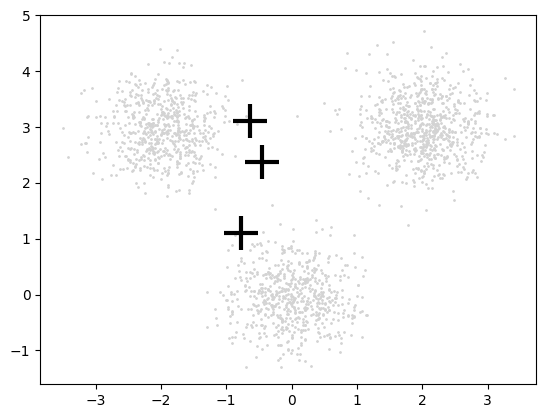

In [ ]:
# Plot the data and the initial values of the centers
plt.plot(X[:, 0], X[:, 1], 'o', color='lightgray', markersize = 1)
plt.plot(Minit[:, 0], Minit[:, 1], 'k+', mew = 3, ms=25)
plt.show()

In [ ]:
from matplotlib.colors import cnames as mcolors
def plot_clusters(X, r, k, M):
    if k > 3:
        colors = mcolors.keys()
    else:
        colors = ['r', 'g', 'b']

    for k in range(K):
        plt.plot(X[r[:,k]==1, 0], X[r[:,k]==1, 1], '.', color=colors[k], markersize = 3)

    plt.plot(M[:, 0], M[:, 1], 'k+', mew = 3, ms=25)
    plt.show()

def plot_costs(costs):
    x = range(1, len(costs)+1)
    y = costs
    plt.plot(x, y)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Cost Function =")
    plt.xticks(x)
    plt.show()

In [ ]:
def ml_kmeans(X, M):
    N, D = X.shape
    K = M.shape[0]
    # Apply the two steps of K means until convergence
    tol = 1e-6
    # Jold = np.inf
    # J = 0
    maxIters = 15
    M = np.copy(Minit)
    costs = []

    plt.plot(X[:, 0], X[:, 1], 'o', color='lightgray', markersize = 1)
    plt.plot(Minit[:, 0], Minit[:, 1], 'k+', mew = 3, ms=25)
    plt.show()

    for it in range(maxIters):
        r = np.zeros((N, K))
        # Step 1 -- Assign data to clusters
        for i in range(N):#for each observation X[i]
            min_dist, min_idx = -1, -1
            for j in range(K):#calculate its minimum distance from all clusters M_j, j = 0..K-1
                dist = np.linalg.norm( X[i] - M[j] ) ** 2
                if min_idx == -1:
                    min_dist, min_idx = dist, j
                elif min_dist > dist:
                    min_dist, min_idx = dist, j
            #assign X[i] to cluster min_idx
            r[ i ][ min_idx ] = 1

        # Step 2 -- Update mean centers
        for k in range( K ):
            updated_pos = np.zeros_like( M[k] )
            tot = 0
            for i in range( N ):
                if r[i][k] == 1:
                    updated_pos += r[i][k] * X[i]
                    tot += 1

            M[k] = updated_pos / tot

        # Step 3 -- Calculate cost function and check for convergence
        J = 0
        for i in range( N ):
            for j in range( K ):
                #if r[i][k] == 1:
                J += r[i][k] * np.linalg.norm( X[i] - M[k] ) ** 2


        costs.append( J )
        print("Iteration #{}, Cost function value: {}".format(it, J))

        plot_clusters(X, r, k, M)
    plot_costs(costs)

    return M, r, J

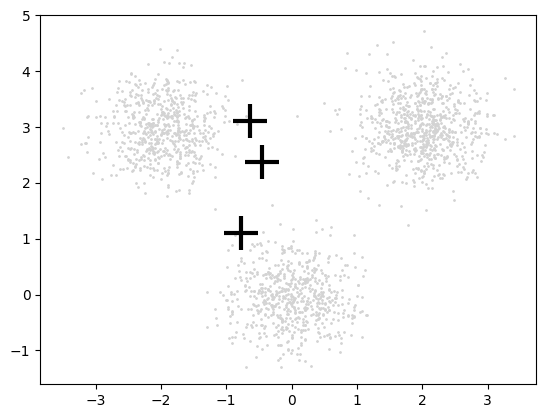

Iteration #0, Cost function value: 6605.353144823067


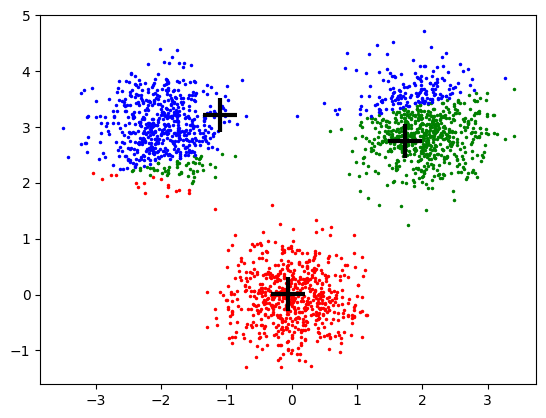

Iteration #1, Cost function value: 850.325639633682


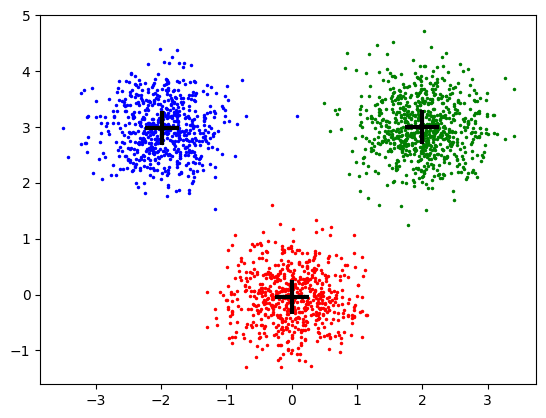

Iteration #2, Cost function value: 837.3448886902656


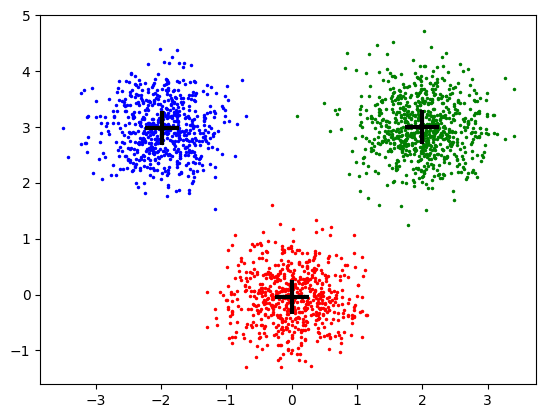

Iteration #3, Cost function value: 837.3448886902656


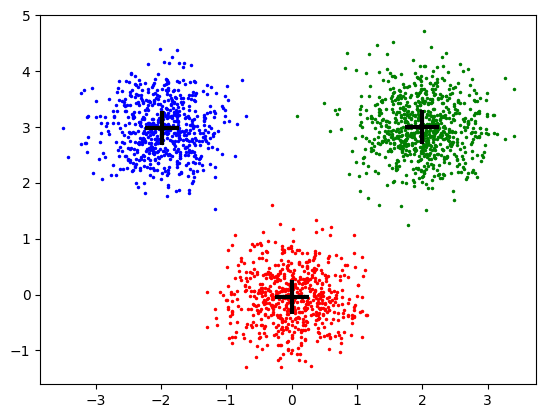

Iteration #4, Cost function value: 837.3448886902656


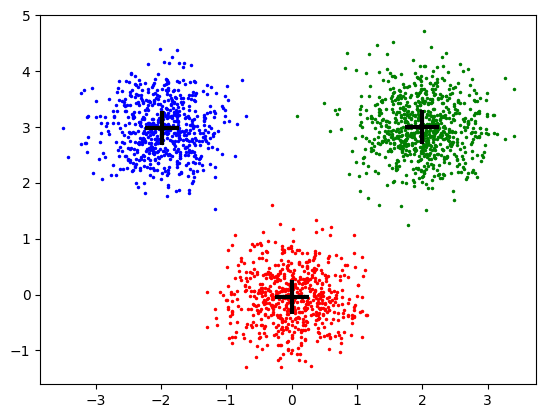

Iteration #5, Cost function value: 837.3448886902656


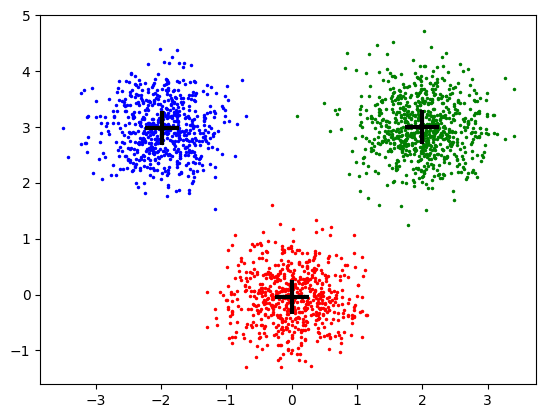

Iteration #6, Cost function value: 837.3448886902656


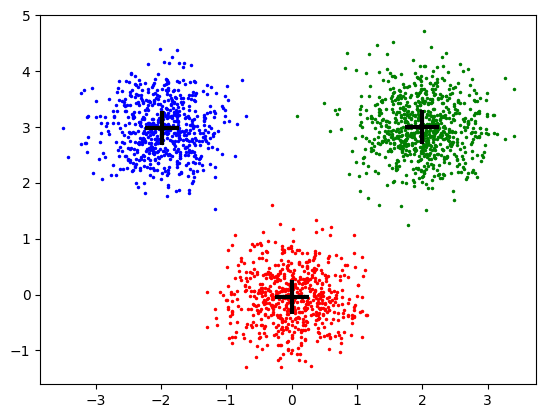

Iteration #7, Cost function value: 837.3448886902656


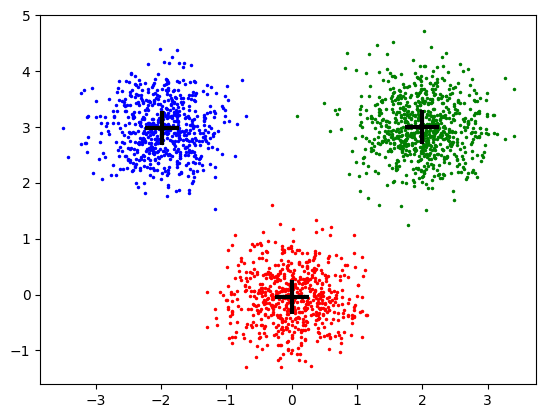

Iteration #8, Cost function value: 837.3448886902656


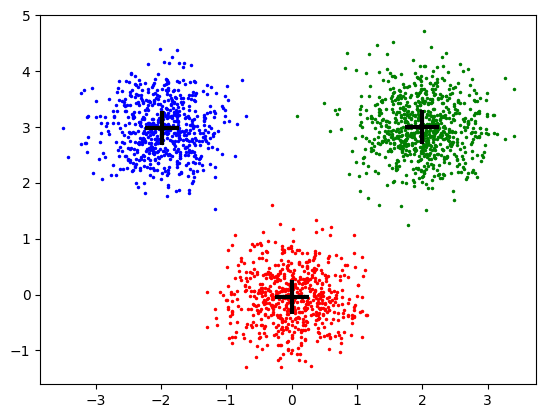

Iteration #9, Cost function value: 837.3448886902656


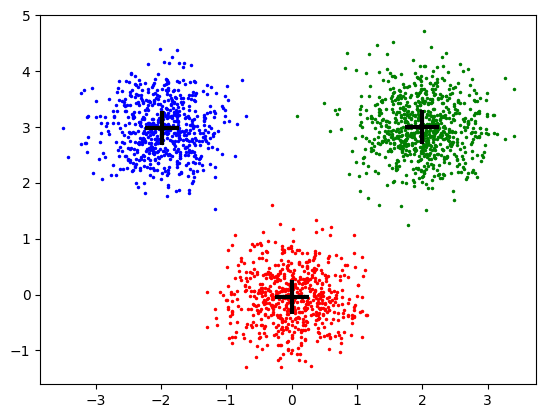

Iteration #10, Cost function value: 837.3448886902656


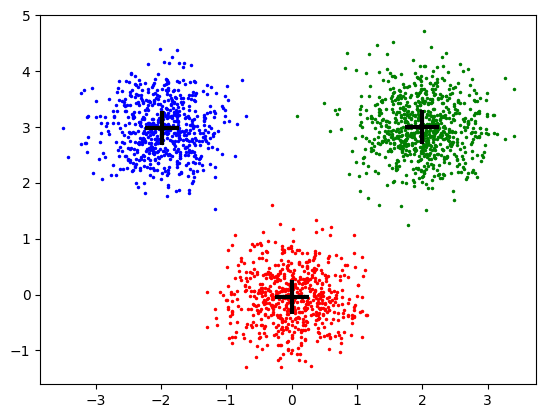

Iteration #11, Cost function value: 837.3448886902656


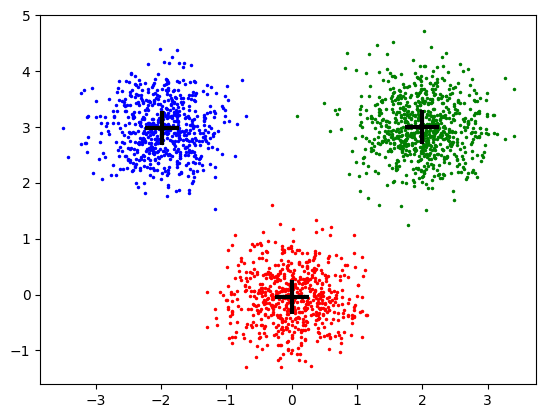

Iteration #12, Cost function value: 837.3448886902656


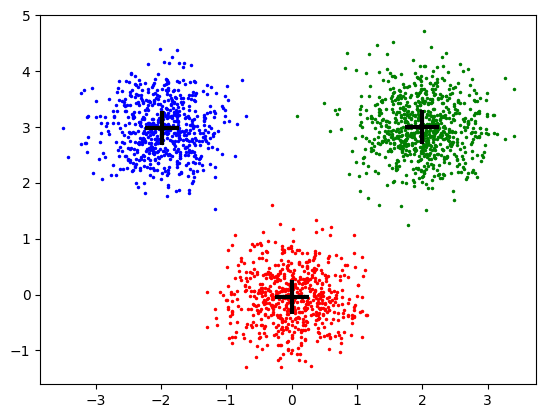

Iteration #13, Cost function value: 837.3448886902656


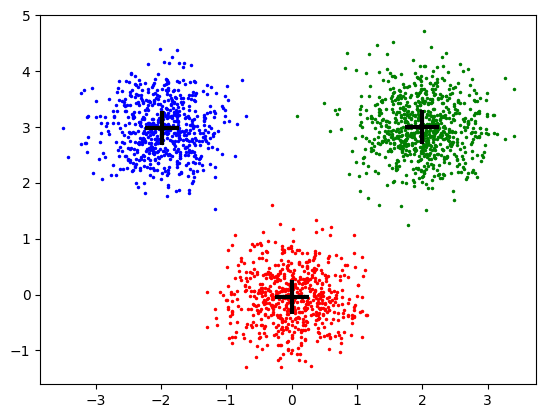

Iteration #14, Cost function value: 837.3448886902656


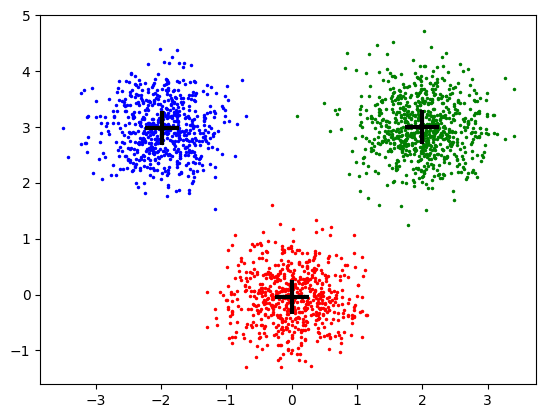

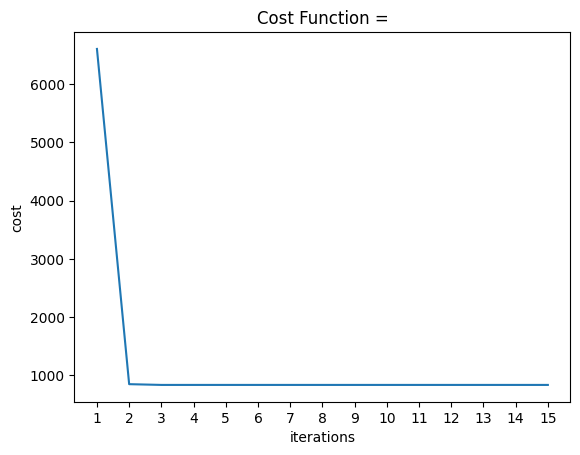

In [ ]:
M, r, J = ml_kmeans(X, Minit)

<Figure size 640x480 with 0 Axes>

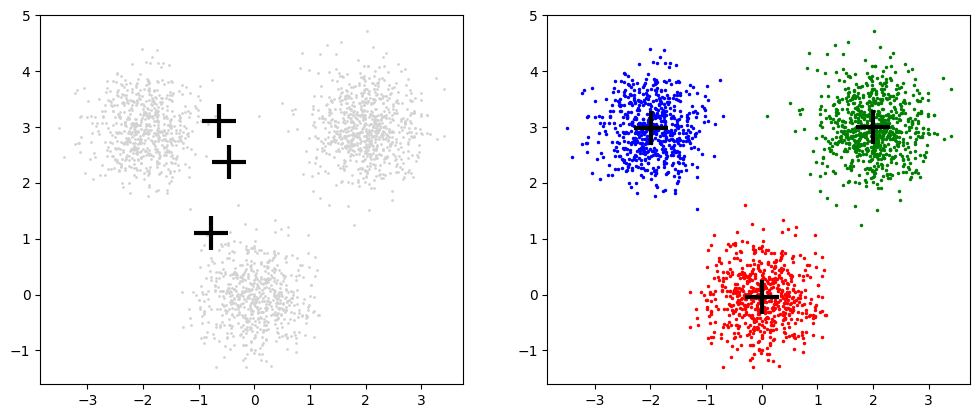

In [ ]:
# Plot the clustering and the centers
fig = plt.figure()
f, ax = plt.subplots(1,2)
f.set_figwidth(12)
ax[0].plot(X[:, 0], X[:, 1], 'o', color='lightgray', markersize = 1)
ax[0].plot(Minit[:, 0], Minit[:, 1], 'k+', mew = 3, ms=25)
if k >3:
    colors = mcolors.keys()
else:
    colors = ['r', 'g', 'b']
for k in range(K):
    ax[1].plot(X[r[:,k]==1, 0], X[r[:,k]==1, 1], '.', color=colors[k], markersize = 3)
ax[1].plot(M[:, 0], M[:, 1], 'k+', mew = 3, ms=25)
plt.show()

In [ ]:
print( "Initial k clusters" )
pd.DataFrame( Minit )

Initial k clusters


,0,1
0,-0.772905,1.101805
1,-0.453797,2.382644
2,-0.642760,3.104714


In [ ]:
import pandas as pd
print( "Final k clusters" )
pd.DataFrame(M)

Final k clusters


,0,1
0,0.006988,-0.047052
1,1.998422,2.995294
2,-1.982915,2.978678


In [ ]:
print( "True k cluster" )
pd.DataFrame(Mtrue)

True k cluster


,0,1
0,0,0
1,-2,3
2,2,3


# KNN

In [ ]:
#from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import scipy.io

In [ ]:
def load_data_subset():
    """
    Load subsets from MNIST for 5 and 9"""
    data = scipy.io.loadmat('data/mnist/mnist_all.mat')
    X_train = np.vstack([data['train5'],data['train9']])/255
    X_test = np.vstack([data['test5'],data['test9']])/255
    y_train = np.vstack([np.array([[1,0] for _ in range(data['train5'].shape[0])]),
                         np.array([[0,1] for _ in range(data['train9'].shape[0])])])
    y_test = np.vstack([np.array([[1,0] for _ in range(data['test5'].shape[0])]),
                         np.array([[0,1] for _ in range(data['test9'].shape[0])])])
    print ("Train data array size: ", X_train.shape)
    print ("Train truth array size: ", y_train.shape)
    print ("Test data array size: ", X_test.shape)
    print ("Test truth array size: ", y_test.shape)
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = load_data_subset()


Train data array size:  (11370, 784)
Train truth array size:  (11370, 2)
Test data array size:  (1901, 784)
Test truth array size:  (1901, 2)


In [ ]:
def sqrdist(x, y):
    y = np.tile(y,(x.shape[0],1))
    d = np.sqrt((np.square(x-y).sum(axis=1)))
    return d

In [ ]:
def knn_test(X, T, Xtest, K):
    Ntest = Xtest.shape[0]
    Ttest = np.zeros((Ntest, 2))
    for n in range(Ntest):
        d = sqrdist(X, Xtest[n,:])
        # return the indices of the K closest instances
        closest = np.argsort(d)[:K]
        # get the predicted values of the closest instances
        Tclosed = T[closest,:] # shape = kx2
        votes = Tclosed.sum(axis=0) #shape = 2x1
        Ttest[n, np.argmax(votes)] = 1
    return Ttest

In [ ]:
def cross_validation(K, numFolds, X, T):
    """
    """
    N = X.shape[0]
    #random permute the data before we split them
    np.random.seed(10)
    perm = np.random.permutation(N)
    X = X[perm]
    T = T[perm]
    # The fold variable will have size numFolds + 1
    chunk_size = int(N/numFolds)
    split_ind = np.arange(chunk_size,chunk_size*numFolds, chunk_size) # [ 1137  2274  3411  4548  5685  6822  7959  9096 10233]

    # if chunk_size*numFolds < N:
    #     split_ind[-1] = N-1
    # else:
    #     last_chunk = chunk_size

    Xfolds = np.vsplit(X, split_ind) # list of arrays
    Tfolds = np.vsplit(T, split_ind)
    valerr = np.zeros((K, numFolds))

    for k in range(1, K+1):
        for j in range(numFolds):
            X_train = np.vstack([Xfolds[i] for i in range(len(Xfolds)) if i != j])
            y_train = np.vstack([Tfolds[i] for i in range(len(Tfolds)) if i != j])
            X_test = Xfolds[j]
            # prediction using kNN
            Ttest = knn_test(X_train, y_train, X_test, k)
            # Compute the percent misclassified data points
            Tval = np.argmax(Ttest, axis=1)
            Tcor = np.argmax(Tfolds[j], axis=1)
            valerr[k-1, j] = np.count_nonzero(Tval!=Tcor)/X_test.shape[0]
            print("kNN for k = {}, fold # {}, error = {} ".format(k, j, valerr[k-1, j]))
    # average the validation errors
    val = valerr.sum(axis=1)/numFolds
    # select best k
    kbest = np.argmin(val)+1
    # Plot the evolution of the validation error with respect to k
    plt.plot(range(1, K+1), val*100)
    plt.ylabel('Average Validation Error %')
    plt.xlabel('K Nearest Neighbors')
    plt.show()
    print("Best k is {} with average error = {} ".format(kbest, val[kbest]))
    return kbest

kNN for k = 1, fold # 0, error = 0.0008795074758135445 
kNN for k = 1, fold # 1, error = 0.002638522427440633 
kNN for k = 1, fold # 2, error = 0.011433597185576077 
kNN for k = 1, fold # 3, error = 0.0043975373790677225 
kNN for k = 1, fold # 4, error = 0.0043975373790677225 
kNN for k = 1, fold # 5, error = 0.002638522427440633 
kNN for k = 1, fold # 6, error = 0.001759014951627089 
kNN for k = 1, fold # 7, error = 0.010554089709762533 
kNN for k = 1, fold # 8, error = 0.0008795074758135445 
kNN for k = 1, fold # 9, error = 0.005277044854881266 
kNN for k = 2, fold # 0, error = 0.002638522427440633 
kNN for k = 2, fold # 1, error = 0.005277044854881266 
kNN for k = 2, fold # 2, error = 0.011433597185576077 
kNN for k = 2, fold # 3, error = 0.003518029903254178 
kNN for k = 2, fold # 4, error = 0.005277044854881266 
kNN for k = 2, fold # 5, error = 0.0079155672823219 
kNN for k = 2, fold # 6, error = 0.001759014951627089 
kNN for k = 2, fold # 7, error = 0.012313104661389622 
kNN for 

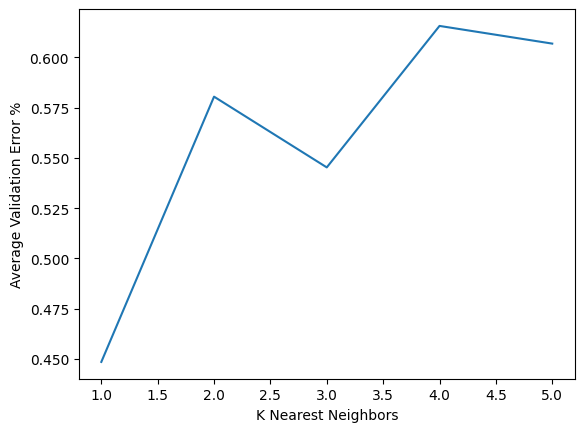

Best k is 1 with average error = 0.005804749340369393 


In [ ]:
kbest = cross_validation(5, 10, X_train, y_train)

In [ ]:
Ttest = knn_test(X_train, y_train, X_test, kbest)

Tval = np.argmax(Ttest, axis=1)
Tcor = np.argmax(y_test, axis=1)
print ("Error is ", np.count_nonzero(Tval!=Tcor)/X_test.shape[0] * 100, " %" )

# Naive Bayes


Check Bishop - Pattern Recognition and Machine Learning Chapter 4.2.3 - Generative Models with Discrete features - Naive Bayes.

In Discriminative models given data $\mathbf{X}$ we want to calculate the probability that it belongs to a class. So we are trying to model $P({C_k} \mid \mathbf{X})$, which actually is finding the boundaries between different classes.

In Generative models we want to model the joint distribution of each class $P(\mathbf{X}, \, {C_k})$.

Given an instance $\mathbf{x}$ we want to calculate $ P({C_k} \mid \mathbf{x})$ for each $k \in K$ and choose the category/class that holds the highest probability.


We will use Bayes Rule to calculate what the probability is
$$
P({C_k} \mid \mathbf{x}) = \frac{P(\mathbf{x} \mid {C_k}) \, P({C_k})}{P(\mathbf{x})} $$




The term "Naive" is adopted because of the naive assumption of independence between every pair of features. Given a class variable y and a dependent feature vector x<sub>1</sub> through x<sub>d</sub>, Bayes’ theorem states the following relationship:

$$P(C_k \mid x_1, \dots, x_d) = \frac{P(x_1, \dots x_d \mid C_k)\, P({C_k})}
                                 {P(x_1, \dots, x_d)}$$
                                 
Using the naive independence assumption that
$$ P(  x_1, \dots, x_d \mid {C_k}) = P(x_1 \mid {C_k}) \dots P(x_d \mid {C_k}) $$


for all i, this relationship is simplified to:

$$P(C_k\mid x_1, \dots, x_d) = \frac{\prod_{i=1}^{n} P(x_i \mid C_k) \,  P({C_k})}
                                 {P(x_1, \dots, x_d)}$$


With respect to the above "naive" assumption for (1)  we use a Bernoulli distribution for each of the K classes:
$$
p(\mathbf{x} \mid  {C_k}) = \prod_{d=1}^D \mu_{k,d}^{x_d} \, (1- \mu_{k,d})^{1 - x_d}
$$
and
$$ P(\mathbf{x}) = \sum_{j=1}^K P(\mathbf{x} \mid {C_j}) \, P({C_j}) $$

Although we want to calculate $ P({C_k} \mid \mathbf{x})$, Naive Bayes is a Generative Model because capture $P(\mathbf{x} \mid {C_k}) \, P({C_k})$ which equals to $P(\mathbf{X}, \, {C_k})$.

Since the denominator is common for all the classifiers for a given $\mathbf{x}$ we need to calculate all the nominators and compare them. Optionally you can use the softmax function to convert ${L(\mu)}$ to real probabilities. The likelihood becomes:
$$ {L(\mu_k)} = \ln \left(p(\mathbf{x} \mid {C_k})P({C_k})\right)= \sum_{n=1}^N \sum_{d=1}^D x_{nd}\,\ln\mu_{k,d} + (1 - x_nd)\ln(1- \mu_{k,d}) + \ln P({C_k})$$

By differentiating the above log likelihood with respect to $\mu_{k,d}$ and equating to zero we obtain the optimal parameters
$$\mu_{k,d} = \frac{\sum_{n \in X_k}  x_{n,d}}{N_k}$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def load_data():
    """
    Loads the MNIST dataset. Reads the training files and creates matrices.
    :return: train_data:the matrix with the training data
    test_data: the matrix with the data that will be used for testing
    train_truth: the matrix consisting of one
                        hot vectors on each row(ground truth for training)
    test_truth: the matrix consisting of one
                        hot vectors on each row(ground truth for testing)
    """
    train_files = ['data/mnist/train%d.txt' % (i,) for i in range(10)]
    test_files = ['data/mnist/test%d.txt' % (i,) for i in range(10)]
    tmp = []
    for i in train_files:
        with open(i, 'r') as fp:
            tmp += fp.readlines()
    # load train data in N*D array (60000x784 for MNIST)
    #                              divided by 255 to achieve normalization
    train_data = np.array([[j for j in i.split(" ")] for i in tmp], dtype='int') / 255
    print ("Train data array size: ", train_data.shape)
    tmp = []
    for i in test_files:
        with open(i, 'r') as fp:
            tmp += fp.readlines()
    # load test data in N*D array (10000x784 for MNIST)
    #                             divided by 255 to achieve normalization
    test_data = np.array([[j for j in i.split(" ")] for i in tmp], dtype='int') / 255
    print ("Test data array size: ", test_data.shape)
    tmp = []
    for i, _file in enumerate(train_files):
        with open(_file, 'r') as fp:
            for line in fp:
                tmp.append([1 if j == i else 0 for j in range(0, 10)])
    train_truth = np.array(tmp, dtype='int')
    del tmp[:]
    for i, _file in enumerate(test_files):
        with open(_file, 'r') as fp:
            for _ in fp:
                tmp.append([1 if j == i else 0 for j in range(0, 10)])
    test_truth = np.array(tmp, dtype='int')
    print ("Train truth array size: ", train_truth.shape)
    print ("Test truth array size: ", test_truth.shape)
    return train_data, test_data, train_truth, test_truth

In [ ]:
X_train, X_test, y_train, y_test = load_data()

Train data array size:  (60000, 784)
Test data array size:  (10000, 784)
Train truth array size:  (60000, 10)
Test truth array size:  (10000, 10)


In [ ]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


## Normalize features

Our feactures will be binary vectors since we will use bernouli distributions. Arbitrarily we decide that whiever pixel is not 0 will be converted to 1.

In [ ]:
X_train[ X_train != 0 ] = 1
X_test[ X_test != 0 ] = 1
X_train = X_train.astype('float')
X_test = X_test.astype( 'float' )

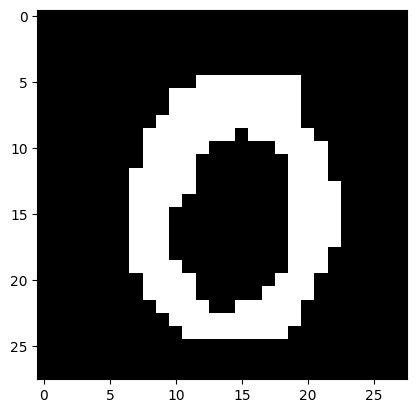

In [ ]:
plt.imshow( X_test[2].reshape( (28,28)), cmap='gray' )

In [ ]:
#use by default ax=1, when the array is 2D
#use ax=0 when the array is 1D
def softmax( x, ax=1 ):
    m = np.max( x, axis=ax, keepdims=True )#max per row
    p = np.exp( x - m )
    return ( p / np.sum(p,axis=ax,keepdims=True) )

In [ ]:
def ml_naive_bayes_train(X, y):
    """
    Trains Naive Bayes classifier for binary input data"""
    N, D = X.shape
    K = y.shape[1]
    m = np.zeros((K,D))
    Nk = np.zeros(K)
    pc = np.zeros(K)
    for k in range(K):
        setNk = np.argwhere(y[:,k]==1)
        Xk = X[setNk, :]
        Nk[k] = Xk.shape[0]
        m[k, :]= Xk.sum(axis=0)/Nk[k] #10x784

    pc = Nk/N
    return m, pc

Calculate the log of
$$
p(\mathbf{x} \mid  {C_k}) = \prod_{d=1}^D \mu_{k,d}^{x_d} \, (1- \mu_{k,d})^{1 - x_d}
$$

In [ ]:
def log_bernoulli(X, mu):
    N = X.shape[0]
    mu[mu<=0] = 1e-100
    mu[mu>=1] = 1 - 1e-100
    logPr = np.sum(X*np.log(mu) + (1-X)*np.log(1-mu), axis=1)
    return logPr


In [ ]:
def ml_naive_bayes_test(m, pc, X_test):
    Ntest = X_test.shape[0]
    K = m.shape[0]
    logPr = np.zeros((Ntest, K))
    for k in range(K):
        logPr[:, k] = log_bernoulli(X_test, m[k,:])+ np.log(pc[k])
    y_test = softmax(logPr)
    # Hard classification decisions
    ttest = np.argmax(y_test, axis=1)
    return ttest

In [ ]:
# Train the model
mu, pc = ml_naive_bayes_train( X_train, y_train )

(10, 784)


In [ ]:
# Test the model
predicted_test = ml_naive_bayes_test(mu, pc, X_test)

In [ ]:
T_true = np.argmax(y_test, axis=1)

In [ ]:
print( "Error is %lf" % ( np.mean( T_true != predicted_test ) * 100 ) + '%' )

Error is 15.880000%


Now through training we have learnt the values of all $\mu_{k,d}$ parameters which are the average values for each dimension in each category. Lets take a look at how these look.

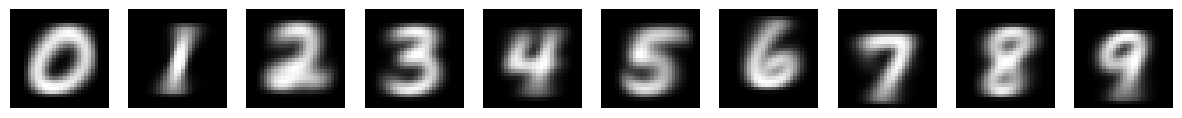

In [ ]:
f, ax = plt.subplots(1,10)
f.set_figheight(15)
f.set_figwidth(15)
for k in range(10):
    im = mu[k].reshape( (28,28) ) * 255#Image.fromarray((m[k]).reshape(28,28)*255)
    ax[k].axis('off')
    ax[k].imshow( im, cmap='gray' )

The "magic" with generative models is that since they model the joint distribution they learn how data for each category look like. That means that we can create new data instances that have not been encountered before and actually do not exist!

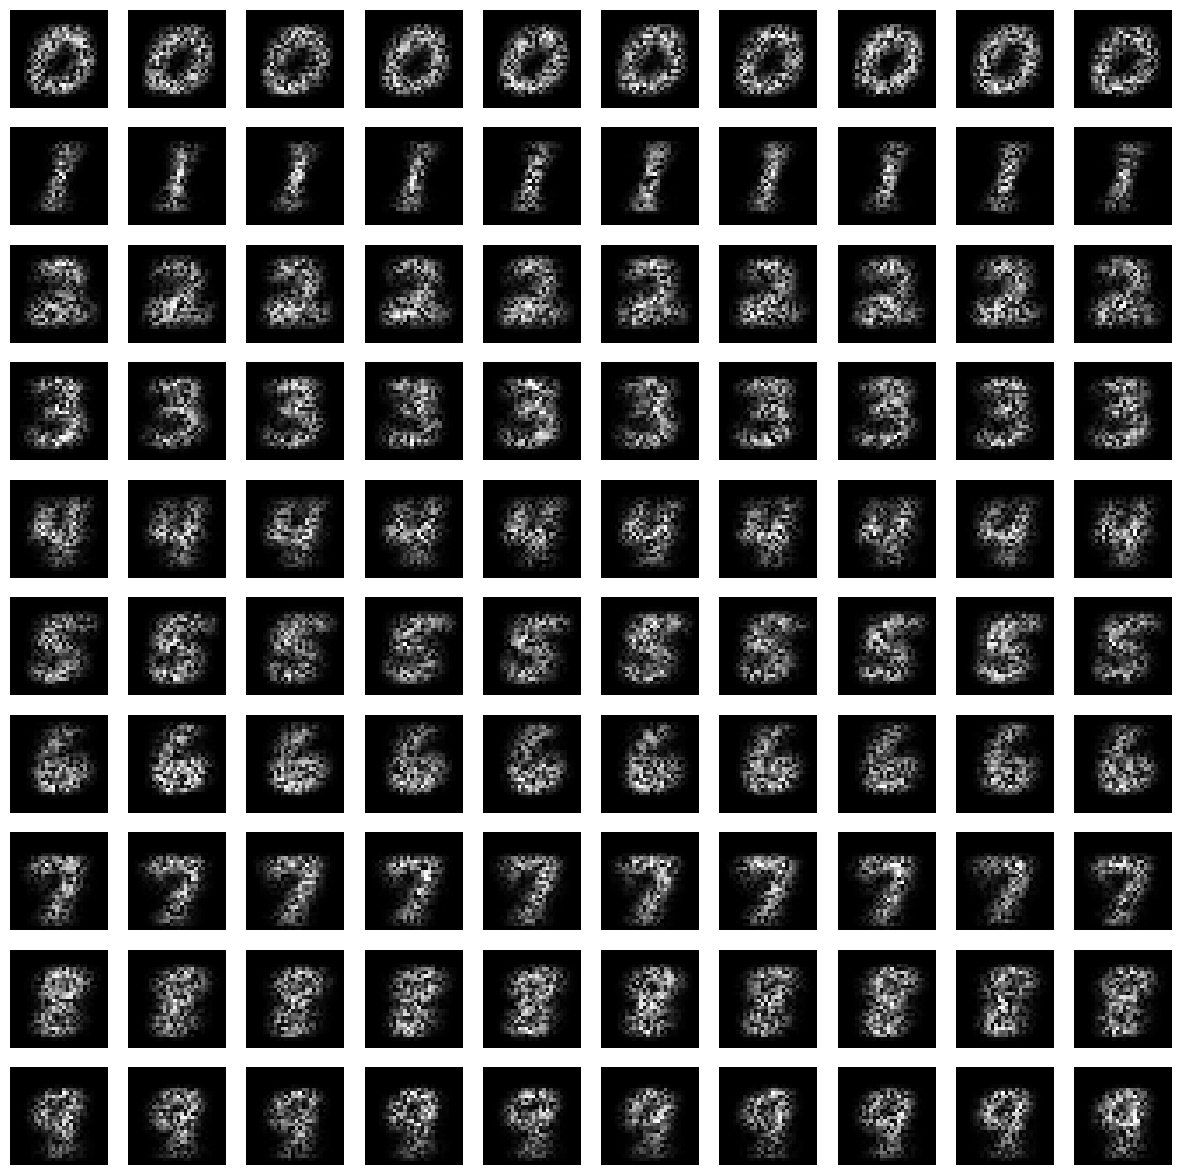

In [ ]:
f, ax = plt.subplots(10,10)
f.set_figheight(15)
f.set_figwidth(15)
for k in range(10):
    for i in range(10):
        im = ((mu[k]*np.random.rand(784)).reshape(28,28)*255)
        ax[k, i].axis('off')
        ax[k, i].imshow( im, cmap='gray' )

# Support Vector Machines (SVMs)
https://www.youtube.com/watch?v=T9UcK-TxQGw&t

**We want to estimate our weights such that :**

$$
w \cdot x_i - b \geq 1 \quad \text{if } y_i = 1
$$
$$
w \cdot x_i - b \leq -1 \quad \text{if } y_i = -1
$$
$$
y_i (w \cdot x_i - b) \geq 1
$$
$$
\text{with } y \in \{-1, 1\}
$$

**Cost funtion :**

$$
l = \max(0, 1 - y_i(w \cdot x_i - b))
$$

$$
l =
\begin{cases}
0 & \text{if } y \cdot f(x) \geq 1 \\
1 - y \cdot f(x) & \text{otherwise}
\end{cases}
$$

$$$$
$$$$


$$J = \lambda \|w\|^2 + \frac{1}{n} \sum_{i=1}^n \max(0, 1 - y_i (w \cdot x_i - b)) $$

$$\text{if } y_i \cdot f(x) \geq 1:$$

$$J_i = \lambda \|w\|^2$$


$$\text{else:}$$

$$J_i = \lambda \|w\|^2 + 1 - y_i (w \cdot x_i - b)
$$

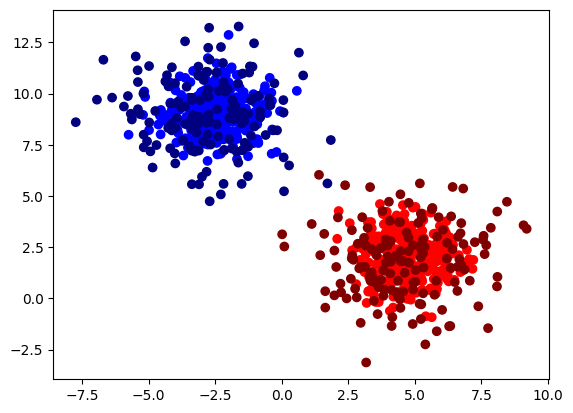

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

np.random.seed(0)

X_train, y_train = make_blobs(n_samples=700, centers=2, random_state=42)
y_train = np.where(y_train == 0, -1, 1)


X_test, y_test = make_blobs(n_samples=300, centers=2, random_state=42)
y_test = np.where(y_test == 0, -1, 1)
X_test += np.random.randn(X_test.shape[0], X_test.shape[1])*1.5



plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='jet')


plt.show()

In [ ]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.line = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0


        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:

                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

(2,)
(2500, 2)


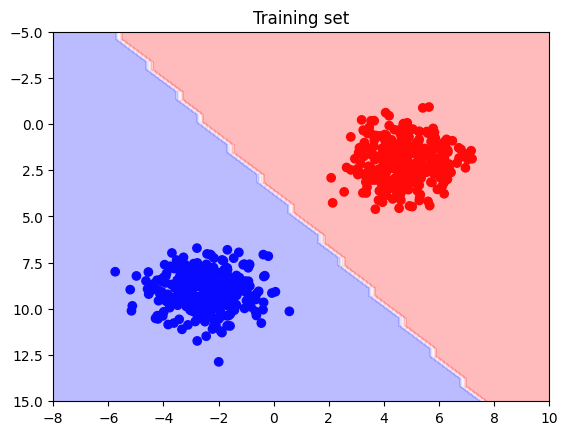

(2500, 2)


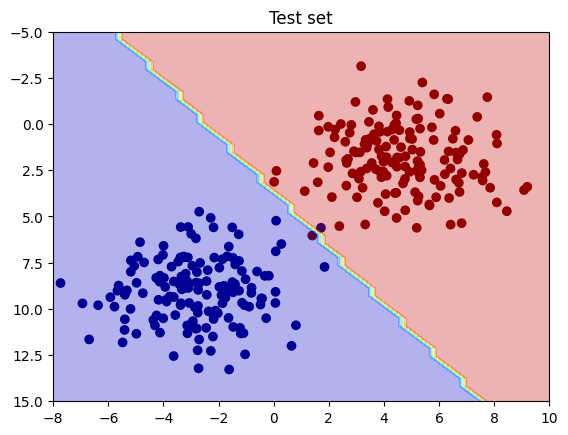

In [ ]:
# Initialize and train the SVM
clf = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
clf.fit(X_train, y_train)

# Plot the decision boundary
def plot_decision_boundary(X, y, model, cmap, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
    ax = plt.gca()
    xlim = [-8, 10]
    ylim = [15, -5]

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))

    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    print(xy.shape)

    Z = model.predict(xy).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    ax.set_title(title)

    plt.ylim(ylim)
    plt.xlim(xlim)


    plt.show()


plot_decision_boundary(X_train, y_train, clf, 'bwr', 'Training set')

plot_decision_boundary(X_test, y_test, clf, 'jet', 'Test set')

In [ ]:
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

train_accuracy = np.mean(train_predictions == y_train)
test_accuracy = np.mean(test_predictions == y_test)

print("Train accuracy :", train_accuracy)
print("Test accuracy  :", test_accuracy)

Train accuracy : 1.0
Test accuracy : 0.9933333333333333
